# 『시작하세요! 텐서플로 2.0 프로그래밍』 (2020, 김환희 지음, 위키북스)

<br>
<br>

- 예제 코드: [깃허브 저장소](https://github.com/wikibook/tf2), [위키북스](https://wikibook.co.kr/tf2)

# 4장 회귀

In [ ]:
# 텐서플로 2.3.1 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.3.1
except Exception:
    pass
import tensorflow as tf

In [1]:
# Google Colab 운영체제 확인
import platform
print(platform.platform())

Windows-10-10.0.18362-SP0


In [8]:
# 3.5 텐서플로우 불러오기, 버전 확인
import tensorflow as tf
print(tf.__version__)

2.3.1


In [9]:
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

<br>
<br>

#  4.1 선형 회귀(Linear Regression)

* 2018년 지역별 인구증가율과 고령인구비율

| <center>지역</center> | <center>인구증가율</center> | <center>고령인구비율</center> | 
|:--------|:--------|:--------|
| 인천 | 0.3 | 12.27 |
| 서울 | -0.78 | 14.44 |
| 경기 | 1.26 | 11.87 |
| 강원 | 0.03 | 18.75 |
| 충남 | 1.11 | 17.52 |
| 세종 | 15.17 | 9.29 |
| 충북 | 0.24 | 16.37 |
| 경북 | -0.24 | 19.78 |
| 전북 | -0.47 | 19.51 |
| 대전 | -0.77 | 12.65 |
| 대구 | -0.37 | 14.74 |
| 울산 | -0.85 | 10.72 |
| 전남 | -0.41 | 21.94 |
| 광주 | -0.27 | 12.83 |
| 경남 | 0.02 | 15.51 |
| 부산 | -0.76 | 17.14 |
| 제주 | 2.66 | 14.42 |

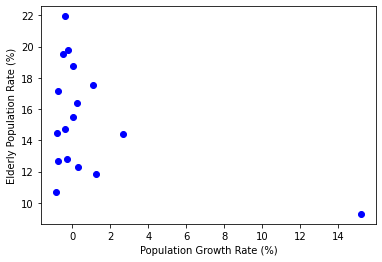

In [4]:
# 4.1 지역별 인구증가율과 고령인구비율 시각화
import matplotlib.pyplot as plt

population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

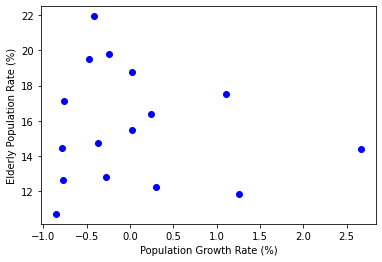

In [5]:
# 4.2 지역별 인구증가율과 고령인구비율 시각화: 극단치 제거
# 세종시 제거
import matplotlib.pyplot as plt

population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_inc = population_inc[:5] + population_inc[6:]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
population_old = population_old[:5] + population_old[6:]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

a: -0.355834147915461 b: 15.669317743971302


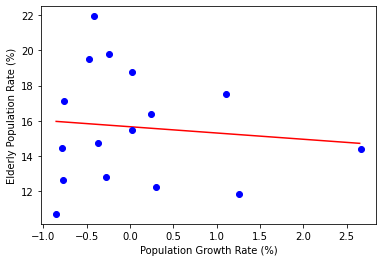

In [6]:
# 4.3 최소제곱법으로 회귀선 구하기
import numpy as np
import matplotlib.pyplot as plt

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# X, Y의 평균을 구합니다.
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

# 최소제곱법으로 a, b를 구합니다.
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print('a:', a, 'b:', b)

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구합니다.
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 붉은색 실선으로 회귀선을 그립니다.
plt.plot(line_x,line_y,'r-')

plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

### 텐서플로를 사용하여 회귀선 구하기

99 a: 0.13619515 b: 6.4682245 loss: 94.24455
199 a: -0.107071094 b: 11.002386 loss: 31.510532
299 a: -0.24996667 b: 13.682989 loss: 13.717154
399 a: -0.31855205 b: 14.969805 loss: 10.268987
499 a: -0.34502503 b: 15.46651 loss: 9.821839
599 a: -0.3532641 b: 15.621099 loss: 9.783124
699 a: -0.35533646 b: 15.659981 loss: 9.780891
799 a: -0.3557563 b: 15.667861 loss: 9.780806
899 a: -0.35582444 b: 15.669137 loss: 9.780804
999 a: -0.35583338 b: 15.669302 loss: 9.780804


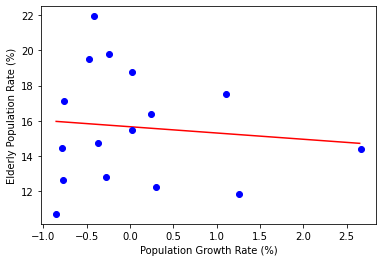

In [7]:
# 4.4 텐서플로를 이용해서 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a와 b를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X + b
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

* loss = tf.reduce_mean((Y - y_pred) ** 2): 잔차 제곱의 평균
* optimizer = tf.keras.optimizers.Adam(lr=0.07): optimizer = tf.optimizers.Adam(lr=0.07) 로 축약하여 사용하여도 된다.

Adam은 SGD와 함께 가장 많이 쓰이는 최적화 함수 중 하나이다.

* lr=0.07: 학습률은 보통 0.1에서 0.0001 사이의 값을 사용한다. 
* for문에서 1,000번 학습시키면서 optimizer.minimize() 함수를 실행한다. 

optimizer.minimize(compute_loss, var_list=[a,b])

첫 번째 인수에는 최소화할 손실을 전달하고, 두 번째 인수인 var_list에는 학습시킬 변수 리스트를 전달하여야 한다. 여기서는 a와 b를 넣었다.

<br>

* Diederik P. Kingma, Jimmy Lei Ba (2015), ADAM: A METHOD FOR STOCHASTIC OPTIMIZATION, Published as a conference paper at ICLR 2015

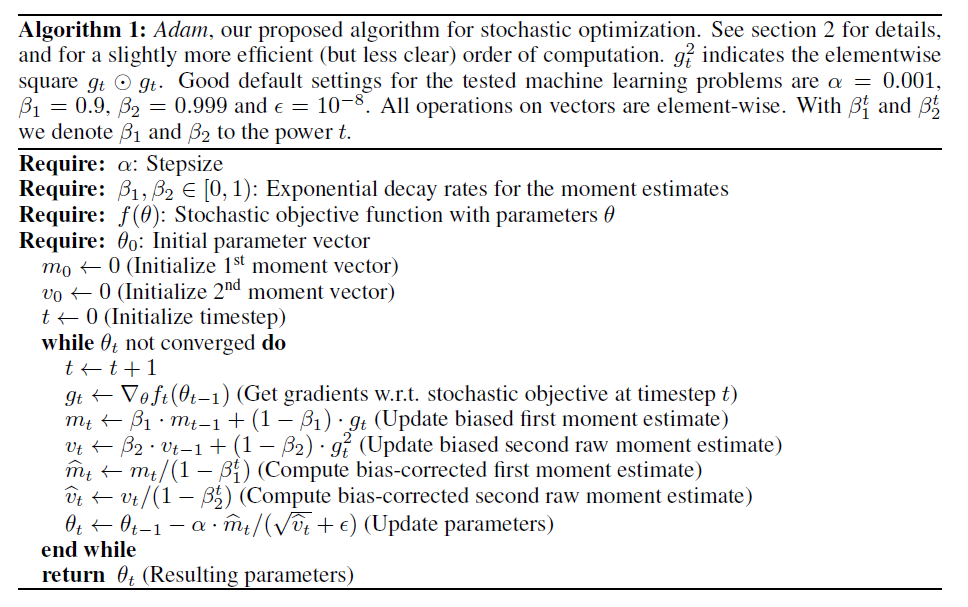

In [8]:
from IPython.display import Image
Image("e:/WORK/Python/텐서플로 2.0 프로그래밍/Adam.png", width=700)

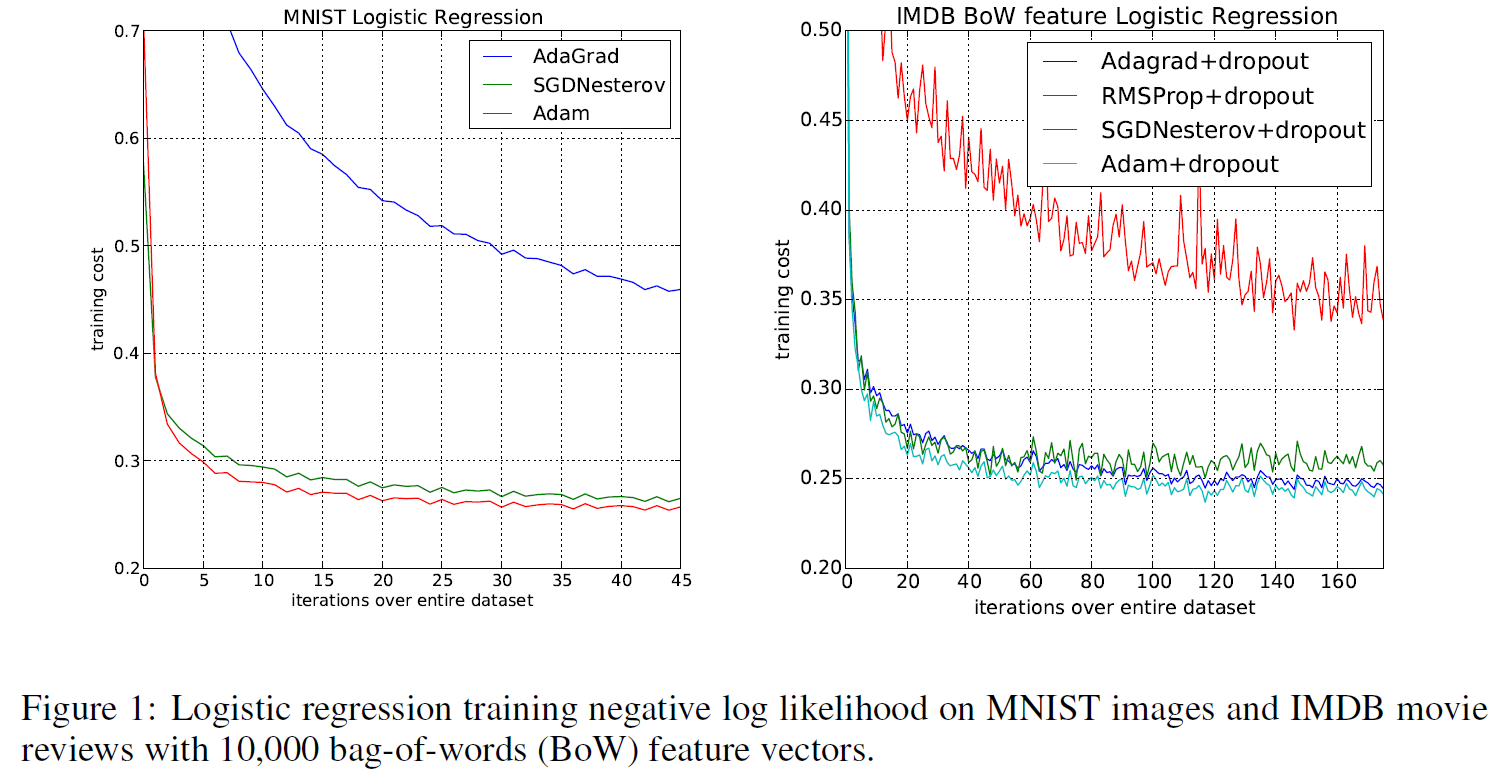

In [12]:
Image("e:/WORK/Python/텐서플로 2.0 프로그래밍/Adam-2.png", width=700)

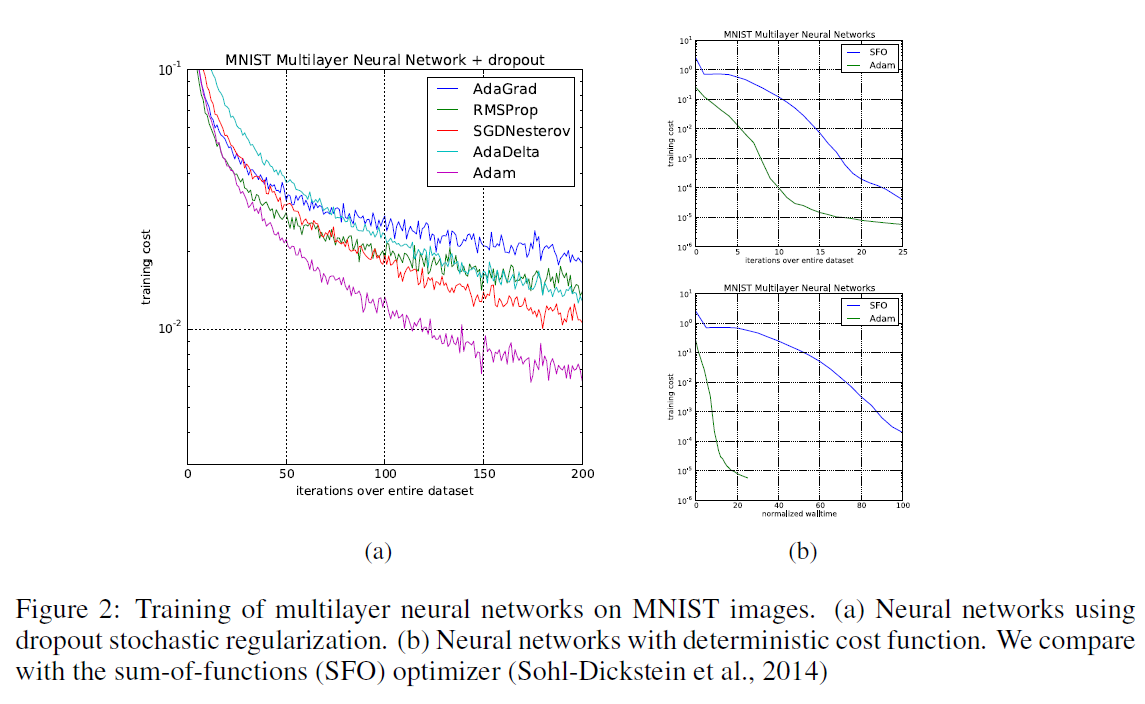

In [10]:
Image("e:/WORK/Python/텐서플로 2.0 프로그래밍/Adam-3.png", width=700)

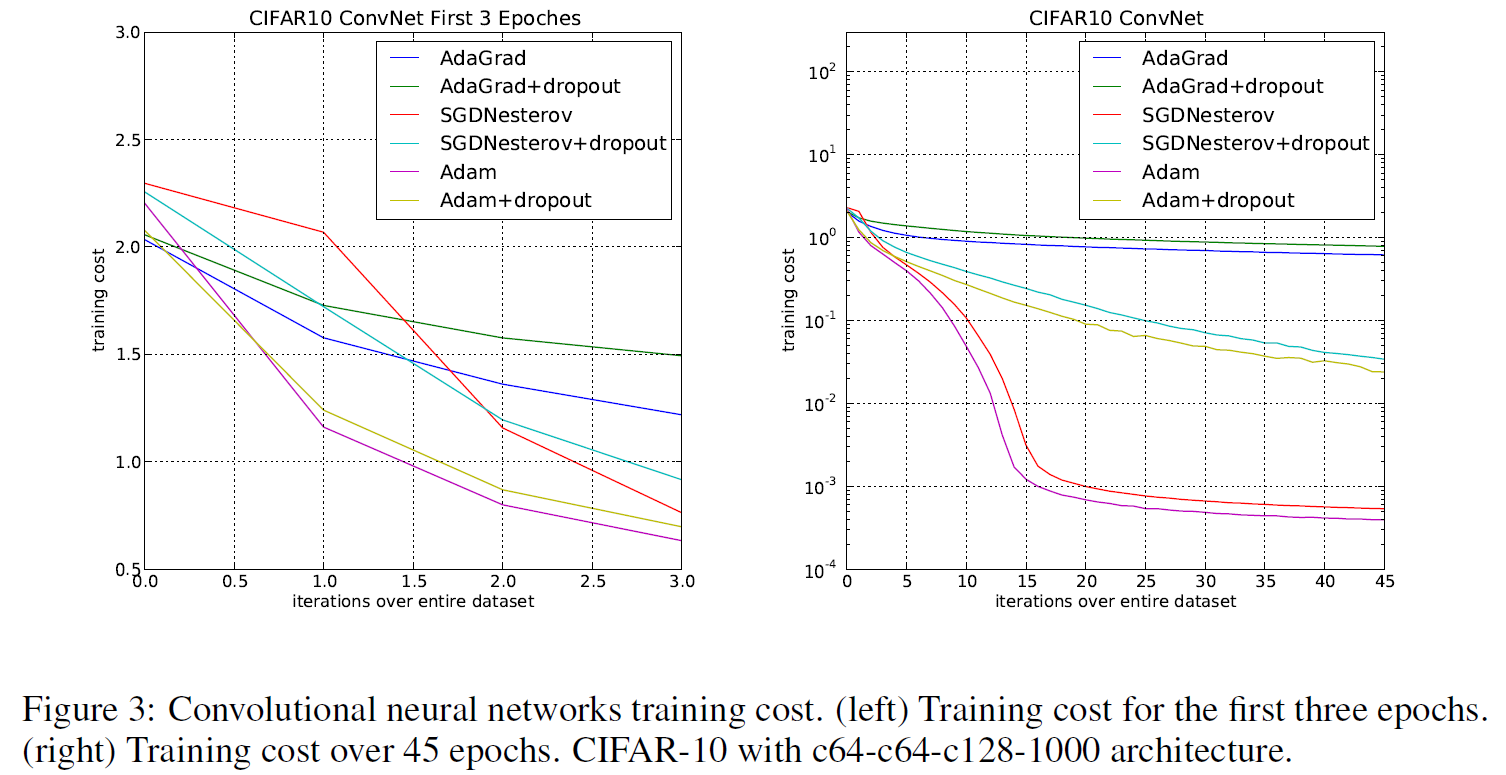

In [11]:
Image("e:/WORK/Python/텐서플로 2.0 프로그래밍/Adam-4.png", width=700)

<br>
<br>

# 4.2 다항 회귀(Polynomial Regression)

### 텐서플로를 이용해서 2차 함수 회귀선 a*x^2 + b*x + c 구하기

99 a: 3.708133 b: -5.2077937 c: 6.800217 loss: 64.61956
199 a: 2.5800014 b: -4.4028983 c: 10.665222 loss: 28.893326
299 a: 1.139246 b: -2.1964657 c: 13.210334 loss: 14.992765
399 a: 0.23024137 b: -0.77052814 c: 14.750778 loss: 10.661838
499 a: -0.24045917 b: -0.032170612 c: 15.5489435 loss: 9.65671
599 a: -0.44918087 b: 0.29520863 c: 15.902971 loss: 9.481554
699 a: -0.52881503 b: 0.42011377 c: 16.038046 loss: 9.458561
799 a: -0.5549944 b: 0.4611743 c: 16.082457 loss: 9.456288
899 a: -0.56239825 b: 0.47278616 c: 16.095016 loss: 9.4561205
999 a: -0.56418973 b: 0.47559735 c: 16.098053 loss: 9.456112


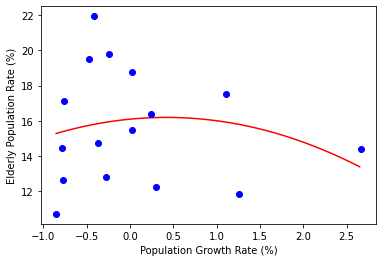

In [13]:
# 4.5 텐서플로우를 이용해서 2차 함수 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a, b, c를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X*X + b * X + c
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b,c])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x + b * line_x + c

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

* 비교: 텐서플로를 이용해서 회귀선 구하기

999 a: -0.35583338 b: 15.669302 loss: 9.780804

* 2차 회귀식이 1차 회귀식보다 손실이 소량 감소하였다.

### 텐서플로를 이용해서 3차 함수 회귀선 ax^3 + b*x^2 + c*x + d 구하기

99 a: -1.1577795 b: 5.8613915 c: -3.9319623 d: 6.4636774 loss: 62.103897
199 a: -1.9438846 b: 6.7207155 c: -2.3084173 d: 10.009428 loss: 30.291618
299 a: -1.646879 b: 5.048444 c: -0.92988515 d: 12.162045 loss: 19.812689
399 a: -0.9262765 b: 2.7689526 c: -0.5415176 d: 13.6544485 loss: 14.115831
499 a: -0.22503744 b: 0.7185448 c: -0.44892004 d: 14.770707 loss: 10.880245
599 a: 0.32775962 b: -0.8741754 c: -0.41569594 d: 15.601916 loss: 9.226308
699 a: 0.7246374 b: -2.0147142 c: -0.3967022 d: 16.19227 loss: 8.472397
799 a: 0.99113405 b: -2.7801933 c: -0.38454083 d: 16.587795 loss: 8.165419
899 a: 1.1594325 b: -3.2635512 c: -0.376952 d: 16.837423 loss: 8.053726
999 a: 1.2595038 b: -3.5509448 c: -0.37246072 d: 16.98582 loss: 8.017437


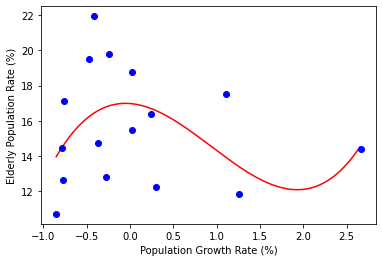

In [14]:
# 4.6 텐서플로우를 이용해서 3차 함수 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a, b, c, d를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X*X*X + b * X*X + c * X + d
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b,c,d])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'd:', d.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x * line_x + b * line_x * line_x + c * line_x + d

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

* 비교: 
    
* 텐서플로를 이용해서 회귀선 구하기: 999 a: -0.35583338 b: 15.669302 loss: 9.780804
* 텐서플로를 이용해서 2차 회귀선 구하기: 999 a: -0.56418973 b: 0.47559735 c: 16.098053 loss: 9.45611
* 3차 회귀식이 1, 2차 회귀식보다 손실이 감소하였다.
* 교재에서는 85-86p 3차 회귀식에서 손실이 무려 123.12474이 나왔다. a, b, c, d를 랜덤한 값으로 초기화하기 때문에 이런 특이한 일이 발생할 수도 있다.
* 다항회귀에서 3차 이상으로 더 차원을 늘릴 수도 있으나 차원이 높아지면 과적합 가능성이 커진다.
* 비선형회귀 등으로 확장이 가능하다. 어느 모형이 가장 적절한 모형인지 모형식을 계속 바꿔가며 최적의 모형을 찾아야 한다.

In [10]:
# '4.6 텐서플로우를 이용해서 3차 함수 회귀선 구하기'를 101번 반복하여 101개의 손실값들을 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

loss_c = []

for j in range(101):

    # a, b, c, d를 랜덤한 값으로 초기화합니다.
    a = tf.Variable(random.random())
    b = tf.Variable(random.random())
    c = tf.Variable(random.random())
    d = tf.Variable(random.random())

    # 잔차의 제곱의 평균을 반환하는 함수입니다.
    def compute_loss():
        y_pred = a * X*X*X + b * X*X + c * X + d
        loss = tf.reduce_mean((Y - y_pred) ** 2)
        return loss

    optimizer = tf.keras.optimizers.Adam(lr=0.07)
    for i in range(1000):
        # 잔차의 제곱의 평균을 최소화(minimize)합니다.
        optimizer.minimize(compute_loss, var_list=[a,b,c,d])
       
    loss_c.append(compute_loss().numpy())
    print("j = ", j)

j =  0
j =  1
j =  2
j =  3
j =  4
j =  5
j =  6
j =  7
j =  8
j =  9
j =  10
j =  11
j =  12
j =  13
j =  14
j =  15
j =  16
j =  17
j =  18
j =  19
j =  20
j =  21
j =  22
j =  23
j =  24
j =  25
j =  26
j =  27
j =  28
j =  29
j =  30
j =  31
j =  32
j =  33
j =  34
j =  35
j =  36
j =  37
j =  38
j =  39
j =  40
j =  41
j =  42
j =  43
j =  44
j =  45
j =  46
j =  47
j =  48
j =  49
j =  50
j =  51
j =  52
j =  53
j =  54
j =  55
j =  56
j =  57
j =  58
j =  59
j =  60
j =  61
j =  62
j =  63
j =  64
j =  65
j =  66
j =  67
j =  68
j =  69
j =  70
j =  71
j =  72
j =  73
j =  74
j =  75
j =  76
j =  77
j =  78
j =  79
j =  80
j =  81
j =  82
j =  83
j =  84
j =  85
j =  86
j =  87
j =  88
j =  89
j =  90
j =  91
j =  92
j =  93
j =  94
j =  95
j =  96
j =  97
j =  98
j =  99
j =  100


In [11]:
 # '텐서플로우를 이용해서 3차 함수 회귀선 구하기'를 101번 반복하여 구한 101개의 손실값들

loss_c

[8.025959,
 8.020317,
 8.01348,
 8.016691,
 8.018397,
 8.021688,
 8.02471,
 8.009703,
 8.0127735,
 8.015512,
 8.015929,
 8.0243225,
 8.022833,
 8.0096655,
 8.016092,
 8.012157,
 8.010935,
 8.026997,
 8.016551,
 8.022761,
 8.0206585,
 8.023059,
 8.015848,
 8.020891,
 8.02501,
 8.013409,
 8.015375,
 8.0181465,
 8.023735,
 8.019508,
 8.027336,
 8.017969,
 8.021313,
 8.0149975,
 8.017666,
 8.013116,
 8.020136,
 8.013807,
 8.022472,
 8.017782,
 8.019454,
 8.023988,
 8.015858,
 8.016123,
 8.02305,
 8.015121,
 8.010032,
 8.014912,
 8.01367,
 8.012974,
 8.012799,
 8.018659,
 8.014158,
 8.019243,
 8.022913,
 8.023513,
 8.023436,
 8.013096,
 8.025692,
 8.016664,
 8.020248,
 8.020163,
 8.01532,
 8.017506,
 8.023839,
 8.020914,
 8.0141735,
 8.019627,
 8.012279,
 8.022817,
 8.013699,
 8.026903,
 8.018724,
 8.023302,
 8.022423,
 8.016449,
 8.010929,
 8.024182,
 8.021813,
 8.0117855,
 8.012856,
 8.014639,
 8.013988,
 8.019576,
 8.025543,
 8.012512,
 8.018333,
 8.01557,
 8.016195,
 8.014389,
 8.01465,

(array([ 5., 14., 13., 16.,  9., 12.,  8., 12.,  7.,  5.]),
 array([8.0096655, 8.011433 , 8.0132   , 8.014967 , 8.016734 , 8.018501 ,
        8.0202675, 8.022035 , 8.023802 , 8.025569 , 8.027336 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

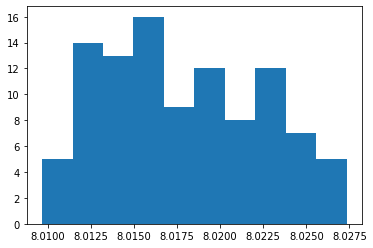

In [12]:
plt.hist(loss_c)

<br>
<br>

# 4.3 딥러닝 네트워크를 이용한 회귀

### 회귀식을 가정하고 변수를 직접 추정하지 않아도 딥러닝 네트워크를 이용해 회귀식을 예측하는 방법

In [18]:
# 4.7 딥러닝 네트워크를 이용한 회귀
import tensorflow as tf
import numpy as np

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


* 첫 번째 레이어에는 6개의 뉴런을 할당했다. 뉴런이 많을수록 딥러닝 네트워크의 표현력이 좋아지지만 너무 많으면 학습이 제대로 안되거나 과적합될 수 있다. 
* 두 번째 레이어는 하나의 X 입력값에 대한 하나의 Y 값만 출력해야 하므로 뉴런 수가 1개이다.

* Dense 레이어의 파라미터 수(가중치 개수): `(입력측 뉴런의 수 + 1)*(출력측 뉴런의 수)`
* 입력층과 은닉층 사이의 가중치 개수: 입력노드 1개, 은닉노드 6개, 편향 1개이므로 총 12개 (`(1+1)*6 = 12`)
* 은닉층과 출력층 사이의 가중치 개수: 은닉노드 6개, 출력노드 1개, 편향 1개이므로 총 3개 (`(6+1)*1 = 7`)
* 총 가중치 개수: 12 + 7 = 19 (개)

In [19]:
# 4.8 딥러닝 네트워크의 학습
model.fit(X, Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 2ms/step - loss: 256.6910
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 96.9807
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 12.0133
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 9.8010
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 9.5889
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 9.5597
Epoch 7/10
1/1 [==============================] - 0s 997us/step - loss: 9.5427
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 9.5259
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 9.5078
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 9.4883


* 학습을 계속하면 에포크 9, 10 정도에서 손실이 거의 줄어들지 않는 것을 확인할 수 있다. 손실에 거의 변화가 없으면 학습이 거의 다 된 것이다.
* 딥너닝을 포함한 머싱러닝에서는 충분히 학습됐다고 판단되면 학습을 종료하여야 한다. 그렇지 않으면 학습 데이터에 과적합되어 현재 학습 데이터의 경향성은 지나칠 정도로 잘 반영하지만 새로운 데이터가 주어지면 유연하게 대처하지 못할 수 있다. 학습 데이터 중 일부를 떼어 검증 데이터 (validation data)를 설정하는 것은 학습을 언제 멈출지 결정하는 데 좋은 판단 기준이 된다.

In [16]:
# 4.9 딥러닝 네트워크의 Y값 예측
model.predict(X)

array([[15.98292  ],
       [15.47274  ],
       [15.581294 ],
       [15.973216 ],
       [15.682945 ],
       [15.986272 ],
       [15.892908 ],
       [15.759614 ],
       [15.484023 ],
       [15.82544  ],
       [15.389904 ],
       [15.800602 ],
       [15.879096 ],
       [15.971575 ],
       [15.49517  ],
       [13.9252405]], dtype=float32)

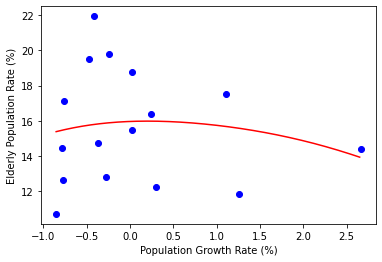

In [17]:
# 4.10 딥러닝 네트워크의 회귀선 확인
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

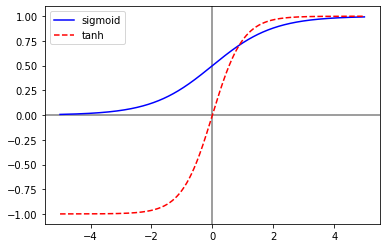

In [20]:
# 그림 4.2 출력 코드
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.legend()
plt.show()

* 그림. sigmoid 함수와 tanh 함수의 비교

<br>
<br>

# 4.4 보스턴 주택 가격 데이터세트(Boston Housing Dataset)

In [22]:
# 4.11 데이터 불러오기
from tensorflow.keras.datasets import boston_housing

(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [7]:
# 4.12 데이터 전처리(정규화)
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [8]:
# 4.13 Boston Housing Dataset 회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 52)                728       
_________________________________________________________________
dense_1 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


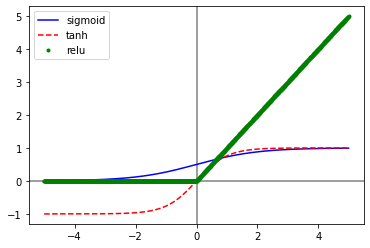

In [9]:
# 그림 4.5 출력 코드
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

In [10]:
# 4.14 회귀 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 0s 16ms/step - loss: 1.4029 - val_loss: 0.6335
Epoch 2/25
10/10 [==============================] - 0s 5ms/step - loss: 0.6887 - val_loss: 0.5134
Epoch 3/25
10/10 [==============================] - 0s 6ms/step - loss: 0.4122 - val_loss: 0.2192
Epoch 4/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2096 - val_loss: 0.2237
Epoch 5/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1837 - val_loss: 0.2318
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1648 - val_loss: 0.2011
Epoch 7/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1516 - val_loss: 0.1148
Epoch 8/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1106 - val_loss: 0.1374
Epoch 9/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1003 - val_loss: 0.1347
Epoch 10/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0958 - val_loss: 0.1201
Epoch 11/25
10/10 

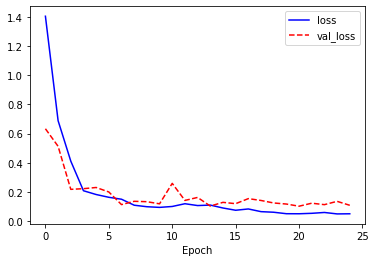

In [11]:
# 4.15 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [12]:
# 4.16 회귀 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 0.5020


0.5020208954811096

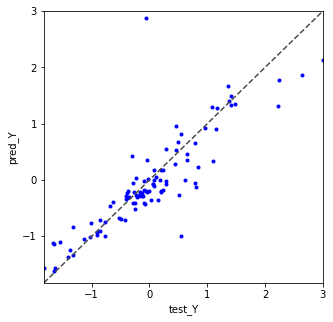

In [13]:
# 4.17 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

In [29]:
# 4.18 모델 재정의 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
10/10 [==============================] - 0s 9ms/step - loss: 1.5699 - val_loss: 0.8037
Epoch 2/25
10/10 [==============================] - 0s 5ms/step - loss: 0.5144 - val_loss: 0.3361
Epoch 3/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2673 - val_loss: 0.3426
Epoch 4/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2098 - val_loss: 0.2156
Epoch 5/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1822 - val_loss: 0.2042
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2239 - val_loss: 0.2355
Epoch 7/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2350 - val_loss: 0.1574
Epoch 8/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1599 - val_loss: 0.1330
Epoch 9/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1313 - val_loss: 0.1334
Epoch 10/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1266 - val_loss: 0.1221
Epoch 11/25
10/10 [

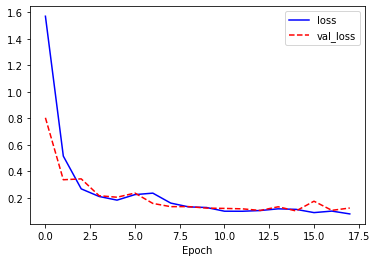

In [30]:
# 4.19 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [31]:
# 4.20 회귀 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 0.3032


0.30322206020355225

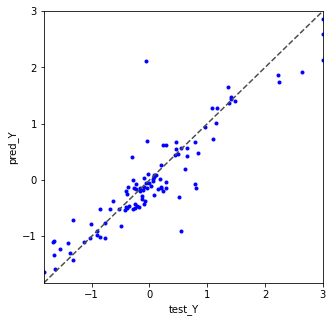

In [32]:
# 4.21 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()